AQUI HAY QUE ENTREGAR LA MIERDA GORDA
- EL DATASET ESTÁ YA LIMPITO
- NO HAGAIS COSAS POR HACER QUE EL CODIGO SE LA SOPLA COMPLETAMENTE
-

# Data Cleaning

In [1]:
# Load libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'src\rawDataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


- To ensure the integrity and reliability of our data, we are first going to look for missing values and duplicate records. Identifying and addressing these issues is crucial for accurate analysis and model performance.

In [3]:
# Missing Values
missing_values = df.isna().sum()
if missing_values.any():
    print("Missing Values by Column:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [6]:
# Duplicate Rows
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"There are {duplicate_count} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

No duplicated rows found in the dataset.


- Our secon performance is removeing the non-essential columns {RowNumber}, {Surname}, and {CustomerId}, which don't contribute to predictive modeling.

- Also we are encoding categorical data to numerical values using LabelEncoder. By transforming categorical columns, we make our dataset suitable for machine learning algorithms, which typically require numerical input. This encoding process helps convert categorical values like {Gender} or {Geography} into integer labels, for models to interpret and process these features more effectively.

In [7]:
df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

In [15]:
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

catcols = ['Gender','Geography', 'Card Type']
encData = encoder.fit_transform(df[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
df = pd.concat([df.drop(columns= catcols),encDF],axis=1)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_1,Geography_1,Geography_2,Card Type_1,Card Type_2,Card Type_3
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,1,0,0


- As shown, our dataset seems to be be complete and reliable. There are no missing values, ensuring every column is fully populated, and there are no duplicate records, which maintains the accuracy of our analysis. Additionally, all columns have consistent data types, further supporting the integrity of the dataset. This robust data quality provides a solid foundation for our machine learning project.

### Analyzing attributes

1- *Credit Score*

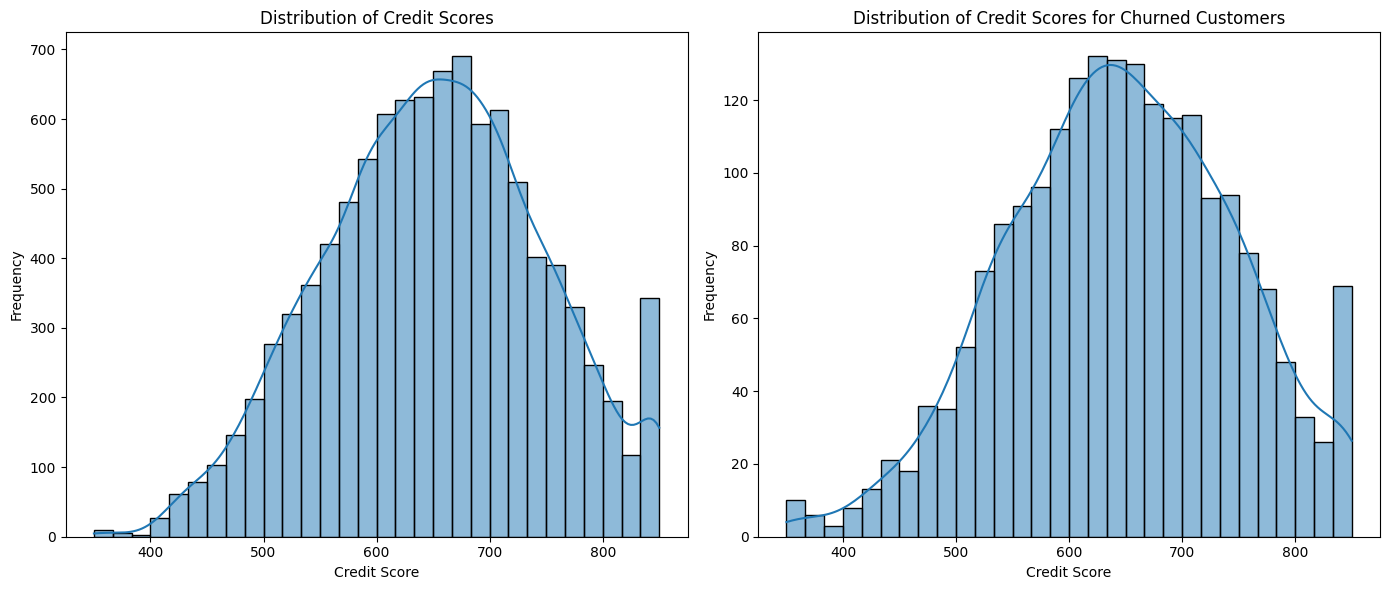

In [9]:
plt.figure(figsize=(14, 6))

# Credit Scores
plt.subplot(1, 2, 1)
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

# Churned Credit Scores
churned_df = df[df['Exited'] == 1]
plt.subplot(1, 2, 2)
sns.histplot(churned_df['CreditScore'], bins=30, kde=True)
plt.title('Distribution of Credit Scores for Churned Customers')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

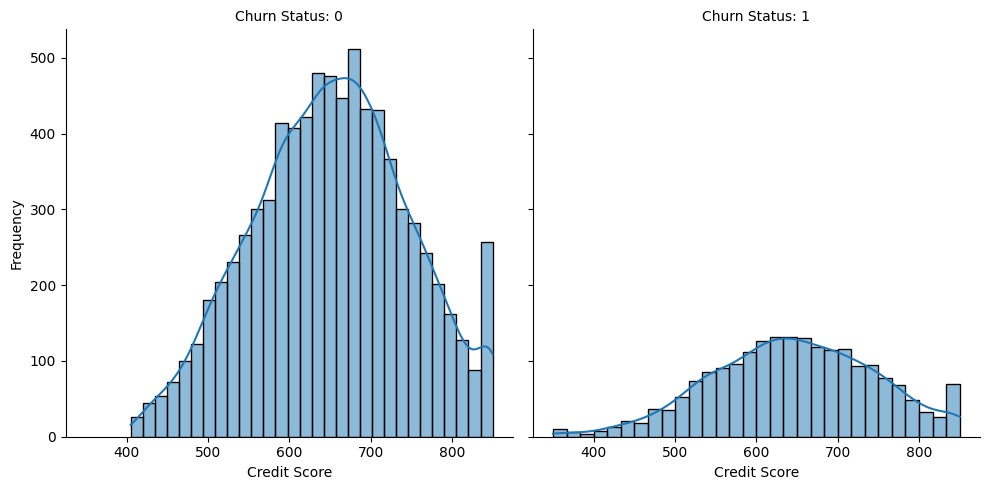

In [10]:
g = sns.FacetGrid(df, col='Exited', height=5, aspect=1)
g.map(sns.histplot, 'CreditScore', bins=30, kde=True)
g.set_titles('Churn Status: {col_name}')
g.set_axis_labels('Credit Score', 'Frequency')
plt.show()

- According to the similarity of graphs, Credit Scores might not be significantly differentiate between churned and retained customers.

2- *Geography*

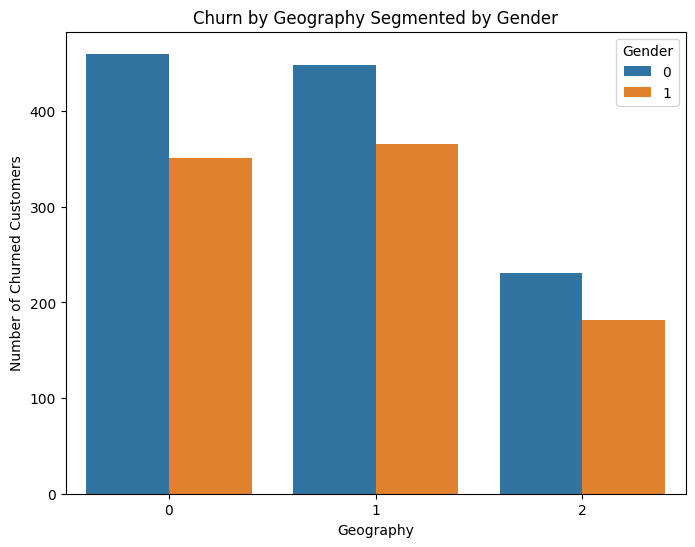

In [11]:
churned_df = df[df['Exited'] == 1]


# Plot: Churn by geography segmented by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=churned_df)
plt.title('Churn by Geography Segmented by Gender')
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.show()

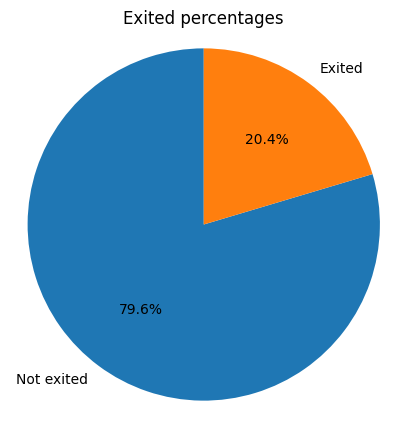

In [12]:
plt.figure(figsize= (5,5))
plot_data = (df[['Exited']].value_counts())
plt.pie(plot_data, labels=['Not exited', 'Exited'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Exited percentages')
plt.show()

Observations: We can see in this piechart the distribution of our dataset for our objective (bank churn). We found that we have an unbalance in our dataset, having only a 20.4% of exited rows.

Solutions: We are going to apply 

'''Results:
    We have found that aproximatedly 79.6% of our dataset are cases in which the customer has exited, so we have a big imbalanced data.

    BUSCAR SOLUTIONES FUTURAS
    
    '''

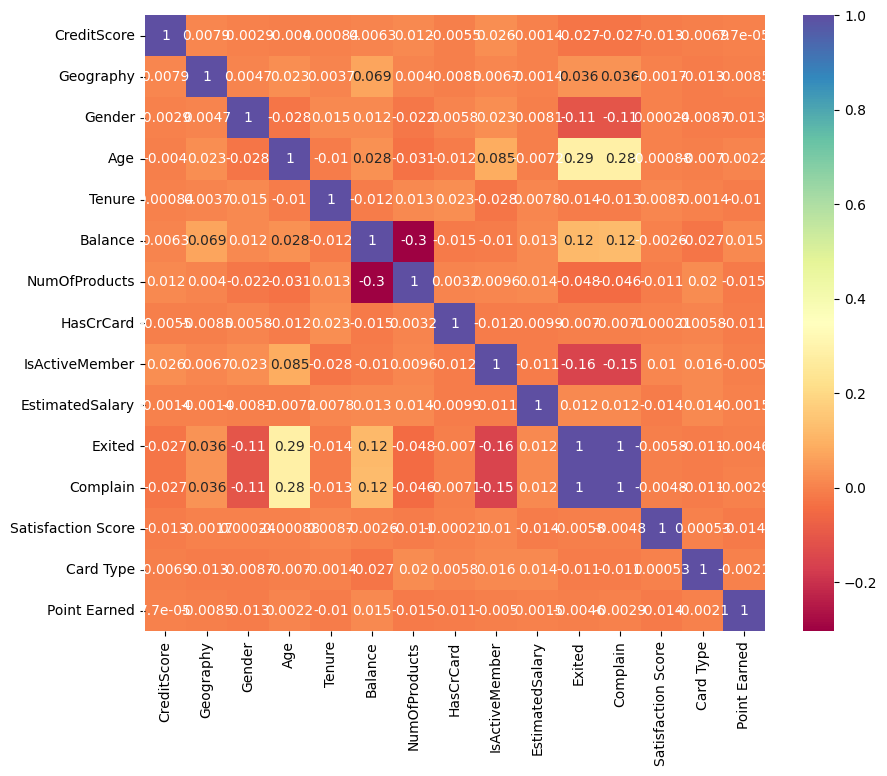

In [13]:
'''Correlation Matrix'''
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap= "Spectral")
plt.show()

Results: As the correlation matrix shows, columns Exited and Complain are perfectly positive linear correlated. 

<Axes: xlabel='Balance'>

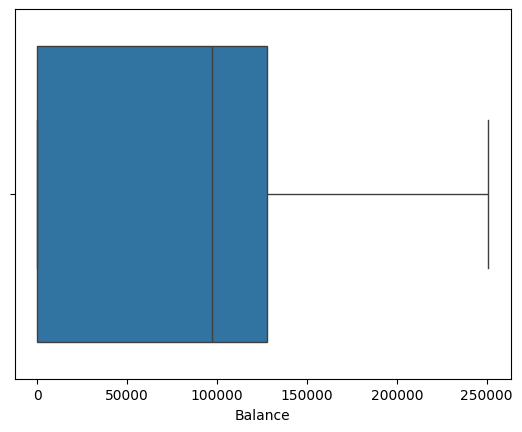

In [14]:
sns.boxplot(x=df['Balance'], )